         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_wor

C:\Users\vamsi\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\vamsi\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\vamsi\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\vamsi\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\vamsi\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: 

Logistic 0.9516908212560387 0.03490852142755838
['2' '2' '2' '4' '2' '2' '2' '2' '2' '2' '4' '2' '2' '2' '4' '4' '2' '4'
 '4' '4' '4' '2' '2' '2' '4' '2' '2' '2' '2' '4' '2' '4' '2' '4' '2' '4'
 '2' '4' '2' '4' '4' '2' '4' '2' '4' '4' '2' '2' '2' '4' '4' '2' '4' '2'
 '2' '2' '2' '2' '2' '4' '4' '4' '2' '2' '4' '2' '4' '4' '4' '2' '2' '4'
 '2' '2' '4' '2' '2' '2' '2' '2' '4' '4' '4' '2' '4' '2' '2' '2' '4' '4'
 '2' '4' '2' '4' '2' '2' '4' '2' '2' '2' '2' '2' '2' '2' '4' '2' '4' '2'
 '4' '2' '2' '4' '4' '2']
Accuracy is  91.22807017543859 % for K-Value: 1
0.9122807017543859
['2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '4' '2' '4'
 '4' '4' '4' '2' '2' '2' '4' '2' '2' '2' '2' '4' '2' '4' '2' '4' '2' '4'
 '2' '4' '2' '4' '4' '2' '4' '2' '4' '4' '2' '2' '2' '4' '4' '2' '4' '2'
 '2' '2' '2' '2' '2' '4' '4' '4' '2' '2' '4' '2' '4' '4' '4' '2' '2' '4'
 '2' '2' '4' '2' '2' '2' '2' '2' '4' '4' '4' '2' '4' '2' '2' '2' '4' '4'
 '2' '4' '2' '2' '2' '2' '4' '2' '2' '2' '2' '2' '2' '2'

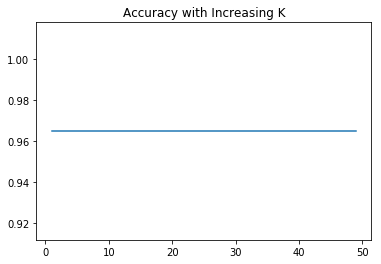

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
#import mglearn
import time


#Load the file
data = pd.read_csv('U:/datascience/knn/Dataset-c.csv',
                   index_col=False)
print(data.head(5))
print(data.shape)
print(data.describe())

#Replace 'M' and 'B' with 4 and 2
data['diagnosis'] =  data['diagnosis'].apply(lambda x: '2' if x == 'B' else '4')
data = data.set_index('id')
#del data['Unnamed: 32']
#print(data)

#print(data.groupby('diagnosis').size())

#split the data into predictor variables and target variable, following by breaking them into train and test sets.
# We will use 20% of the data as test set.
y = data['diagnosis'].values
X = data.drop('diagnosis', axis=1).values

#SPlit the data set
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.20,random_state=0)

#Baseline algorithm checking
#From the dataset, we will analysis and build a model to predict if a given set of symptoms lead to breast cancer.
#Create empty list
models_list = []
#Append the algorithm name and instance
models_list.append(('KNN', KNeighborsClassifier()))
models_list.append(('Logistic', LogisticRegression()))
#print(models_list)

#Divide the dataset into 10 subsets
num_folds = 10
#Storing the result
results = []
#Storing the names
names = []

for name, model in models_list:
    kfold = KFold(n_splits=num_folds, random_state=0)
    cv_results = cross_val_score(model, X_train, y_train,
                                 cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print(name, cv_results.mean(), cv_results.std())
for K in range(15):
    Kvalue = K + 1
    knclassifier = KNeighborsClassifier(n_neighbors=Kvalue, 
                                        weights='uniform', algorithm='auto')
    knclassifier.fit(X_train, y_train)
    y_pred = knclassifier.predict(X_test)
    print(y_pred)
    print("Accuracy is ", accuracy_score(y_test,y_pred)* 100,
          "% for K-Value:",Kvalue)
    accuracy = knclassifier.score(X_test, y_test)
    print(accuracy)

#mglearn.plots.plot_knn_classification(n_neighbors=1)
#plt.show()
print("Accuracy score %f" % accuracy_score(y_test, y_pred))
#Classification Report
print(classification_report(y_test, y_pred))
#Confusion Matrix
print(confusion_matrix(y_test, y_pred))
results1 = []
#print(np.sum(y_pred == y_test) / float(len(y_test)))
for n in range(1, 51, 2):
    accuracy = np.sum(y_pred == y_test) / float(len(y_test))
    print("Neighbors: %d, Accuracy: %3f" % (n, accuracy))
    results1.append([n, accuracy])
results1 = pd.DataFrame(results1, columns=["n", "accuracy"])
plt.plot(results1.n, results1.accuracy)
plt.title("Accuracy with Increasing K")
plt.show()

